Assignment 2: Time Series Forcasting 

Dataset URL: https://www.kaggle.com/datasets/bobnau/daily-website-visitors

In [1]:
# Import necessary libraries for time series analysis
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit


In [9]:
# Add File Path of the CSV file here
# file_path = ""
file_path = "C:/Users/matt/Downloads/archive (3)/daily-website-visitors.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [3]:
# Print column names to identify the correct date column
print(df.columns)


Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')


# Pre Processing for Time Series Analysis:

In [ ]:
# Step 1: Clean the 'Unique.Visits' column by removing commas and converting to numeric
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df = df.sort_values('Date')

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Step 2: Split data into yearly subsets
df['Year'] = df.index.year

# Let's split into training by year: Train from 2014 to 2018, and test on 2019-2020
train = df[df['Year'] <= 2018]['Unique.Visits']
test = df[df['Year'] > 2018]['Unique.Visits']

# Remove the 'Year' column from the data
df.drop('Year', axis=1, inplace=True)

# Initializing Model:

In [ ]:
# Step 3: Initialize and fit the BATS model with appropriate seasonality (e.g., monthly and yearly)
from tbats import BATS
estimator = BATS(seasonal_periods=[7, 30, 365])  # Weekly, monthly, and yearly seasonality
bats_model = estimator.fit(train)

# Step 4: Forecast on the test set
forecast = bats_model.forecast(steps=len(test))

# Model Evaluation:

In [ ]:
# Step 5: Evaluate the model using Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error (MSE) on Test Set: {mse}")

Mean Squared Error (MSE) on Test Set: 147016.63805184697


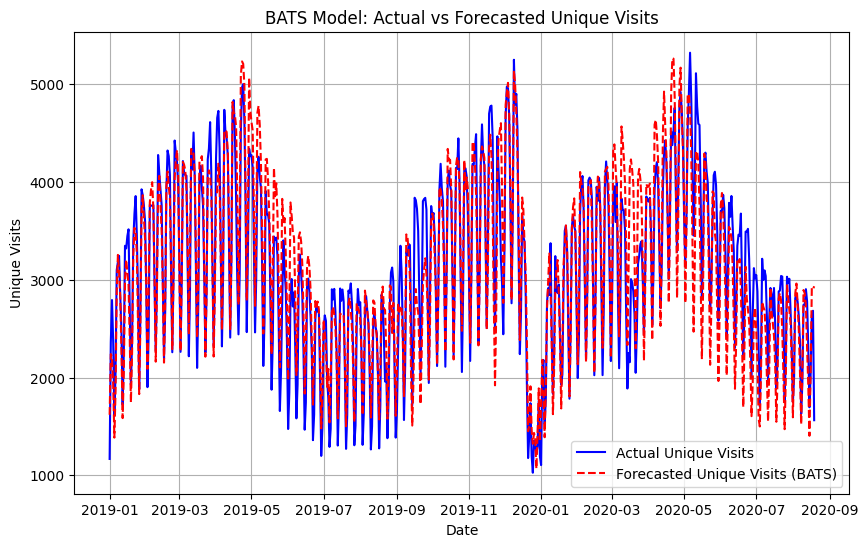

# Model Visualization:

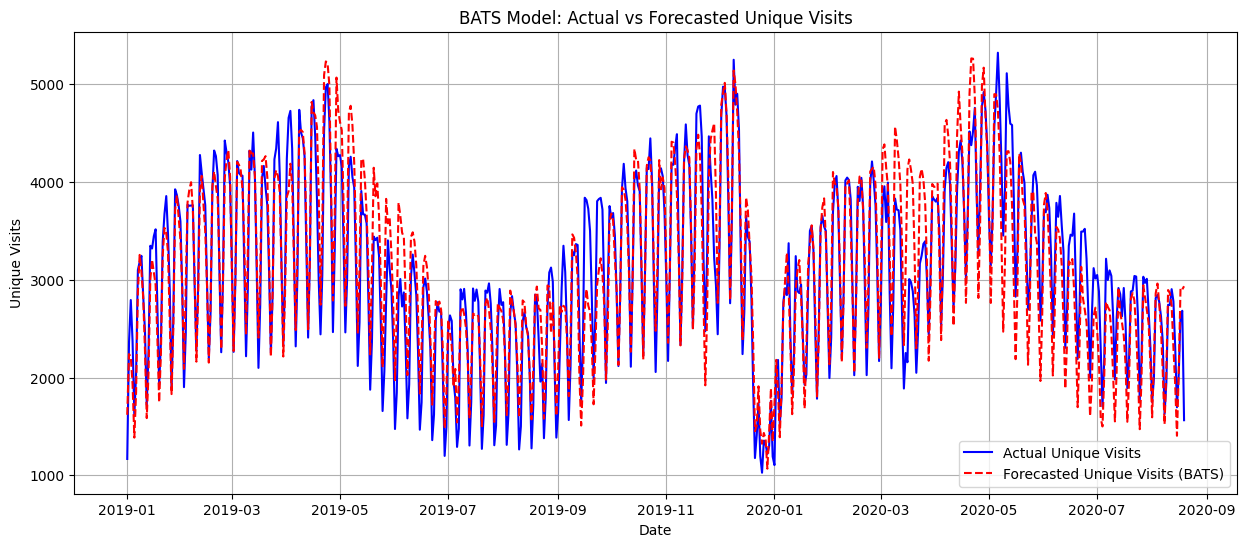

In [11]:
# Step 6: Plot actual vs predicted values

plt.figure(figsize=(15,6))
plt.plot(test.index, test, label='Actual Unique Visits', color='blue')
plt.plot(test.index, forecast, label='Forecasted Unique Visits (BATS)', color='red', linestyle='--')
plt.title('BATS Model: Actual vs Forecasted Unique Visits')
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.legend()
plt.grid(True)
plt.show()